In [73]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [74]:
filepath='spam.csv'
df=pd.read_csv(filepath, encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [75]:
df=df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)
df=df.rename(columns={'v1':'labels','v2': 'sms'})
df.head()


,labels,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
df['labels']=df.labels.map({'spam':0, 'ham':1})
df.head()

,labels,sms
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [77]:
df.shape

(5572, 2)

In [78]:
df['length']=df['sms'].apply(len)
df.head()

,labels,sms,length
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee71b92390>,
      dtype=object)

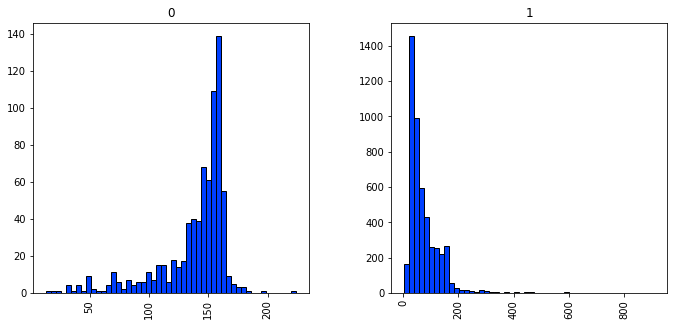

In [79]:


mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
df.hist(column='length', by='labels', bins=50,figsize=(11,5))


In [80]:
message=df[df['length']==100]['sms'].iloc[0]
message

'our mobile number has won å£5000, to claim calls us back or ring the claims hot line on 09050005321.'

In [81]:

lower_case=[]
for i in message:
    lower_case=[i.lower() for i in message]
    print(lower_case)

['o', 'u', 'r', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', 'h', 'a', 's', ' ', 'w', 'o', 'n', ' ', 'å', '£', '5', '0', '0', '0', ',', ' ', 't', 'o', ' ', 'c', 'l', 'a', 'i', 'm', ' ', 'c', 'a', 'l', 'l', 's', ' ', 'u', 's', ' ', 'b', 'a', 'c', 'k', ' ', 'o', 'r', ' ', 'r', 'i', 'n', 'g', ' ', 't', 'h', 'e', ' ', 'c', 'l', 'a', 'i', 'm', 's', ' ', 'h', 'o', 't', ' ', 'l', 'i', 'n', 'e', ' ', 'o', 'n', ' ', '0', '9', '0', '5', '0', '0', '0', '5', '3', '2', '1', '.']
['o', 'u', 'r', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', 'h', 'a', 's', ' ', 'w', 'o', 'n', ' ', 'å', '£', '5', '0', '0', '0', ',', ' ', 't', 'o', ' ', 'c', 'l', 'a', 'i', 'm', ' ', 'c', 'a', 'l', 'l', 's', ' ', 'u', 's', ' ', 'b', 'a', 'c', 'k', ' ', 'o', 'r', ' ', 'r', 'i', 'n', 'g', ' ', 't', 'h', 'e', ' ', 'c', 'l', 'a', 'i', 'm', 's', ' ', 'h', 'o', 't', ' ', 'l', 'i', 'n', 'e', ' ', 'o', 'n', ' ', '0', '9', '0', '5', '0', '0', '0', '5', '3', '2', '1', '.'

In [82]:
sans_punctuation = []
import string

for i in lower_case:
    sans_punctuation.append(i.translate(str.maketrans('', '', string.punctuation)))
print(sans_punctuation)

['o', 'u', 'r', ' ', 'm', 'o', 'b', 'i', 'l', 'e', ' ', 'n', 'u', 'm', 'b', 'e', 'r', ' ', 'h', 'a', 's', ' ', 'w', 'o', 'n', ' ', 'å', '£', '5', '0', '0', '0', '', ' ', 't', 'o', ' ', 'c', 'l', 'a', 'i', 'm', ' ', 'c', 'a', 'l', 'l', 's', ' ', 'u', 's', ' ', 'b', 'a', 'c', 'k', ' ', 'o', 'r', ' ', 'r', 'i', 'n', 'g', ' ', 't', 'h', 'e', ' ', 'c', 'l', 'a', 'i', 'm', 's', ' ', 'h', 'o', 't', ' ', 'l', 'i', 'n', 'e', ' ', 'o', 'n', ' ', '0', '9', '0', '5', '0', '0', '0', '5', '3', '2', '1', '']


In [83]:
preprocessed_documents = []
for i in sans_punctuation:
     preprocessed_documents=[[w for w in i.split()] for i in message]
print(preprocessed_documents)

[['o'], ['u'], ['r'], [], ['m'], ['o'], ['b'], ['i'], ['l'], ['e'], [], ['n'], ['u'], ['m'], ['b'], ['e'], ['r'], [], ['h'], ['a'], ['s'], [], ['w'], ['o'], ['n'], [], ['å'], ['£'], ['5'], ['0'], ['0'], ['0'], [','], [], ['t'], ['o'], [], ['c'], ['l'], ['a'], ['i'], ['m'], [], ['c'], ['a'], ['l'], ['l'], ['s'], [], ['u'], ['s'], [], ['b'], ['a'], ['c'], ['k'], [], ['o'], ['r'], [], ['r'], ['i'], ['n'], ['g'], [], ['t'], ['h'], ['e'], [], ['c'], ['l'], ['a'], ['i'], ['m'], ['s'], [], ['h'], ['o'], ['t'], [], ['l'], ['i'], ['n'], ['e'], [], ['o'], ['n'], [], ['0'], ['9'], ['0'], ['5'], ['0'], ['0'], ['0'], ['5'], ['3'], ['2'], ['1'], ['.']]


In [84]:
import pprint
from collections import Counter
frequency_num=[]

for i in preprocessed_documents:
    frequency_count=Counter(i)
    frequency_num.append(frequency_count)
pprint.pprint(frequency_num)

[Counter({'o': 1}),
 Counter({'u': 1}),
 Counter({'r': 1}),
 Counter(),
 Counter({'m': 1}),
 Counter({'o': 1}),
 Counter({'b': 1}),
 Counter({'i': 1}),
 Counter({'l': 1}),
 Counter({'e': 1}),
 Counter(),
 Counter({'n': 1}),
 Counter({'u': 1}),
 Counter({'m': 1}),
 Counter({'b': 1}),
 Counter({'e': 1}),
 Counter({'r': 1}),
 Counter(),
 Counter({'h': 1}),
 Counter({'a': 1}),
 Counter({'s': 1}),
 Counter(),
 Counter({'w': 1}),
 Counter({'o': 1}),
 Counter({'n': 1}),
 Counter(),
 Counter({'å': 1}),
 Counter({'£': 1}),
 Counter({'5': 1}),
 Counter({'0': 1}),
 Counter({'0': 1}),
 Counter({'0': 1}),
 Counter({',': 1}),
 Counter(),
 Counter({'t': 1}),
 Counter({'o': 1}),
 Counter(),
 Counter({'c': 1}),
 Counter({'l': 1}),
 Counter({'a': 1}),
 Counter({'i': 1}),
 Counter({'m': 1}),
 Counter(),
 Counter({'c': 1}),
 Counter({'a': 1}),
 Counter({'l': 1}),
 Counter({'l': 1}),
 Counter({'s': 1}),
 Counter(),
 Counter({'u': 1}),
 Counter({'s': 1}),
 Counter(),
 Counter({'b': 1}),
 Counter({'a': 1}),


In [85]:
count_vector=CountVectorizer()
print(count_vector)

CountVectorizer()


In [86]:

message=[message]
count_vector.fit(message)
voc=count_vector.get_feature_names()
voc

['09050005321',
 '5000',
 'back',
 'calls',
 'claim',
 'claims',
 'has',
 'hot',
 'line',
 'mobile',
 'number',
 'on',
 'or',
 'our',
 'ring',
 'the',
 'to',
 'us',
 'won']

In [87]:
doc_to_array=count_vector.transform(voc).toarray()
doc_to_array

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0,

In [88]:
frequency_matrix = pd.DataFrame(doc_to_array, 
                                columns = count_vector.get_feature_names())
frequency_matrix

,09050005321,5000,back,calls,claim,claims,has,hot,line,mobile,number,on,or,our,ring,the,to,us,won
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [89]:
X_train, X_test, y_train, y_test = train_test_split(df['sms'],df['labels'],random_state=1)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [90]:
training_data=count_vector.fit_transform(X_train)
testing_data=count_vector.transform(X_test)

In [91]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

In [92]:
svmc = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrgc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
adb = AdaBoostClassifier(n_estimators=62, random_state=111)
bgc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [93]:
clfs = {'SVC' : svmc,'KNN' : knn, 'NB': mnb, 'DT': dtc, 'LR': lrgc, 'RF': rfc, 'AdaBoost': adb, 'BgC': bgc, 'ETC': etc}


In [94]:
pred_scores = {}

In [95]:
for k,v in clfs.items():
    v.fit(training_data, y_train)
    predictions=v.predict(testing_data)
    pred_scores[k]=(( [accuracy_score(y_test,predictions), precision_score(y_test,predictions), recall_score(y_test,predictions), f1_score(y_test,predictions)]))
    

In [96]:
df = pd.DataFrame.from_dict(pred_scores,orient='index', columns=['Accuracy','Precision','Recall ','F1   '])

print(df)

          Accuracy  Precision   Recall      F1   
SVC       0.839196   0.913808  0.900247  0.906977
KNN       0.870782   0.870782  1.000000  0.930929
NB        0.982771   0.990917  0.989283  0.990099
DT        0.962670   0.981743  0.975268  0.978495
LR        0.986360   0.986156  0.998351  0.992216
RF        0.985642   0.983779  1.000000  0.991823
AdaBoost  0.982053   0.984502  0.995054  0.989750
BgC       0.970567   0.986711  0.979390  0.983037
ETC       0.978464   0.977401  0.998351  0.987765


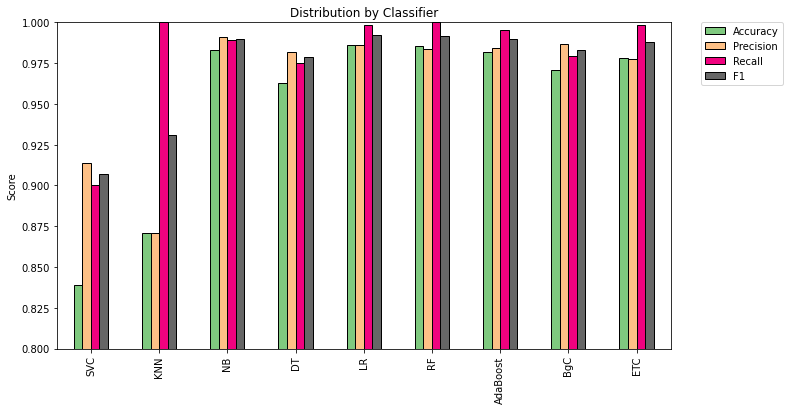

In [97]:
df.plot(kind='bar', ylim=(0.8,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [105]:
print("\n\n[+] lets test with other unique msgs other than the datasets used: ") 
t=[input("[+]enter a text msg to test : ")]
t=np.array(t)
t=count_vector.transform(t)
prediction = mnb.predict(t)
if prediction == 1:
    print("HAAM!")
else:
    ##print("\033[1;31;40m [+]SPAAAM!")
    print("SPAAM!")



[+] lets test with other unique msgs other than the datasets used: 
[+]enter a text msg to test : do u wanna talk
HAAM!
